# United States of Dinosaurs

In this notebook, we will be examining data from the [Paleobiology Database (PBDB)](https://paleobiodb.org/navigator/). Specifically, we will be looking at dinosaur and plant fossils found in the United States of America and observing how the areas where different fossils are found and if their locations are correlated. This notebook also aims to be a guide to the process of Paleobiodogy Database exploratory analysis and data cleaning.

## What is the Paleobiology Database?

PBDB is a public database of paleontological data that anyone can use, maintained by an international non-governmental group of paleontologists. One of its main features is its navigator, which allows a user to sort data by geological time, taxa, authorizer, stratigraphy, and more. PBDB is run by the Department of Geoscience at the University of Wisconsin-Madison. The project team consists of Shanan Peters, Michael McClennan, and John Czaplewski. 

## How do you access the data?

PBDB is free to use and has no requirements for access. After sorting through the [PBDB navigator](https://paleobiodb.org/navigator/) and finding the dataset you want to download, click on the button to the left called "save map data". A window will appear, giving you two choices. You can either download the data as a CSV, JSON, TSV, or RIS file, or you can obtain a URL that can be used for external scripts such as R or Python. If you choose to download the data as a file, it can be used automatically for analysis. However, accessing the data by making HTTP requests is a little more intensive. This tutorial will teach you how to obtain the data desired by using the URL, and will require installation of Python and Jupyter. Download instructions can be found [here for Python](https://realpython.com/installing-python/) and [here for Jupyter](http://jupyter.org/install). In addition, documentation for the data service (including data recorded in the file and instructions on usage) can be found [here](https://paleobiodb.org/data1.2).

## Why PBDB?

The Paleobiology Database has an extensive dataset of different types of plant and animal fossils, and its navigator is visually stunning and well-designed. What drew me to PBDB was its large collection of dinosaur fossils, which is a topic I've always wanted to learn more about. I've heard it said that 3rd graders and scientists know the most about dinosaurs in the world. In this notebook, I will attempt to reach their level of dinsoaur mastery by analyzing the PBDB dinosaur dataset.

# Part I: Dinosaurs

First, let's gather the data we want to further examine. We will do this by making a HTTP request with the URL corresponding to the location of the data we want to look at. 
In order to obtain the URL:
1. Access the [PBDB navigator](https://paleobiodb.org/navigator/)
2. Choose the specimen you want to examine
3. Resize the map to get your desired coordinates 

By running the cell below, we will store the data obtained through the HTTP request, convert the data to a json file, and write the file to "dino_NA.json".

In [4]:
import requests
import json
URL = "https://paleobiodb.org/data1.2/occs/list.json?lngmin=-142.2070&lngmax=-40.9570&latmin=23.8054&latmax=53.0676&base_id=52775&show=coords,attr,loc,prot,time,strat,stratext,lith,lithext,geo,rem,ent,entname,crmod&datainfo"

r = requests.get(url=URL) #store the data obtained through the HTTP request in r
data = r.json() #converts the data in r to a json file
with open("dino_NA.json", "w") as write_file:
    json.dump(data, write_file) #creates file dino_NA.json"

Now, we have to normalize the data by converting the structured json file into a flat table. We do this by importing the pandas library, which has a data structure called a DataFrame where we can store our data. 

In [5]:
import pandas as pd
from pandas.io.json import json_normalize

df = pd.DataFrame.from_dict(json_normalize(data))
df

,access_time,data_license,data_provider,data_source,data_url,documentation_url,elapsed_time,license_url,parameters.base_id,parameters.latmax,parameters.latmin,parameters.lngmax,parameters.lngmin,parameters.show,parameters.taxon_status,parameters.timerule,records,title
0,Tue 2019-04-02 19:50:55 GMT,Creative Commons CC-BY,The Paleobiology Database,The Paleobiology Database,http://paleobiodb.org/data1.2/occs/list.json?l...,http://paleobiodb.org/data1.2/occs/list_doc.html,1.75,http://creativecommons.org/licenses/by/4.0/,52775,53.0676,23.8054,-40.957,-142.207,"coords,attr,loc,prot,time,strat,stratext,lith,...",all,major,"[{'oid': 'occ:139242', 'eid': 'rei:24752', 'ci...",PBDB Data Service


Scrolling through this flattened table, we see that the column "records" has a nested list contained within it. Let's see what it shows:

In [6]:
dino_df = pd.DataFrame.from_dict(json_normalize(data, ["records"]))
dino_df.head()

,ath,ati,cc2,cid,cny,cxi,dcr,dmd,eag,eid,...,srb,sro,srs,ssc,stp,szn,tdf,tec,tid,tna
0,M. Carrano,prs:14,CA,col:11890,NaN,39,2011-05-13 07:45:44,2011-05-12 16:46:47,83.5,rei:24752,...,4.135,bottom to top,Dinosaur Park,bed,Alberta,NaN,subjective synonym of,NaN,txn:53194,Gorgosaurus libratus
1,M. Carrano,prs:14,CA,col:11892,NaN,39,2001-09-18 13:58:56,2013-05-10 07:22:24,83.5,NaN,...,NaN,NaN,NaN,bed,Alberta,NaN,NaN,NaN,txn:38755,Hadrosauridae
2,M. Carrano,prs:14,CA,col:11893,NaN,39,2010-07-27 08:36:19,2010-07-27 10:37:07,83.5,rei:23301,...,NaN,NaN,NaN,bed,Alberta,NaN,NaN,NaN,txn:53194,Gorgosaurus libratus
3,M. Carrano,prs:14,CA,col:11894,NaN,39,2001-09-18 14:04:56,2006-04-21 12:43:50,83.5,NaN,...,4.03,NaN,Dinosaur Park,bed,Alberta,NaN,NaN,NaN,txn:63911,Centrosaurus apertus
4,M. Carrano,prs:14,CA,col:11895,NaN,39,2010-07-27 08:39:37,2010-07-27 10:39:58,83.5,rei:23302,...,NaN,NaN,NaN,bed,Alberta,NaN,NaN,NaN,txn:53194,Gorgosaurus libratus


In [7]:
dino_df.shape

(10976, 61)

We see that this table, which has the raw data we want concerning dinosaurs, has 10948 entries and 61 features in total. We can start cleaning our data now by renaming unintuitive column names, converting data values into something more workable (i.e. the time and date format of the "dcr" and "dmd" columns), and examining missing values. 

In [8]:
def df_rename(df):
    df.rename({"ath": "authorizer",
               "ati": "authorizer_no",
               "cc2": "country",
               "cid": "collection_no",
               "cny": "county",
               "cxi": "cx_int_no",
               "dcr": "created",
                "dmd": "modified",
               "eag": "max_ma",
               "eid": "reid_no",
               "smb": "member",
               "ssc": "stratscale",
               "stp": "state",
               "tdf": "diference",
               "tid": "accepted_no",
                "slb": "local_bed",
                "slo": "local_order",
                "sls": "local_section",
                "env": "environment",
                "ent": "enterer",
                "ggc": "geog_comments",
                "gsc": "geog_scale",
                "gcm": "geology_comments",
                "ff1": "fossils_from_1",
                "ff2": "fossils_from_2",
                "idn": "identified_name",
                "la1": "lith_adj_1",
                "la2": "lith_adj_2",
                "lag": "min_ma",
                "iid": "identified_no",
                "ldc": "lith_descript",
                "lf1": "lithification_1",
                "lf2": "lithification_2",
                "lm1": "minor_lithology_1",
                "lm2": "minor_lithology_2",
                "mdf": "modifier",
                "lt1": "lithology_1",
                "lt2": "lithology_2",
                "ocm": "occurance_comments",
                "oei": "early_interval",
                "oli": "late_interval",
                "ptd": "protected",
                "scm": "strat_comments",
                "srs": "regional_section",
                "sfm": "formation",
                "sgr": "stratgroup",
               "tna": "accepted_name"}, inplace=True, axis="columns")

Here we have defined a rename function that will rename any dataframe with these specific column names. Because any set of data sourced from PBDB have these exact columns, this may be handy if we choose to look at more data from PBDB.

In [9]:
df_rename(dino_df)
dino_df.head()

,authorizer,authorizer_no,country,collection_no,county,cx_int_no,created,modified,max_ma,reid_no,...,srb,sro,regional_section,stratscale,state,szn,diference,tec,accepted_no,accepted_name
0,M. Carrano,prs:14,CA,col:11890,NaN,39,2011-05-13 07:45:44,2011-05-12 16:46:47,83.5,rei:24752,...,4.135,bottom to top,Dinosaur Park,bed,Alberta,NaN,subjective synonym of,NaN,txn:53194,Gorgosaurus libratus
1,M. Carrano,prs:14,CA,col:11892,NaN,39,2001-09-18 13:58:56,2013-05-10 07:22:24,83.5,NaN,...,NaN,NaN,NaN,bed,Alberta,NaN,NaN,NaN,txn:38755,Hadrosauridae
2,M. Carrano,prs:14,CA,col:11893,NaN,39,2010-07-27 08:36:19,2010-07-27 10:37:07,83.5,rei:23301,...,NaN,NaN,NaN,bed,Alberta,NaN,NaN,NaN,txn:53194,Gorgosaurus libratus
3,M. Carrano,prs:14,CA,col:11894,NaN,39,2001-09-18 14:04:56,2006-04-21 12:43:50,83.5,NaN,...,4.03,NaN,Dinosaur Park,bed,Alberta,NaN,NaN,NaN,txn:63911,Centrosaurus apertus
4,M. Carrano,prs:14,CA,col:11895,NaN,39,2010-07-27 08:39:37,2010-07-27 10:39:58,83.5,rei:23302,...,NaN,NaN,NaN,bed,Alberta,NaN,NaN,NaN,txn:53194,Gorgosaurus libratus


In [10]:
dino_df.columns

Index(['authorizer', 'authorizer_no', 'country', 'collection_no', 'county',
       'cx_int_no', 'created', 'modified', 'max_ma', 'reid_no', 'eni',
       'enterer', 'environment', 'fossils_from_1', 'fossils_from_2', 'flg',
       'geology_comments', 'geog_comments', 'geog_scale', 'identified_name',
       'idr', 'identified_no', 'lith_adj_1', 'lith_adj_2', 'min_ma', 'lat',
       'lith_descript', 'lithification_1', 'lithification_2',
       'minor_lithology_1', 'minor_lithology_2', 'lng', 'lithology_1',
       'lithology_2', 'modifier', 'mdi', 'occurance_comments',
       'early_interval', 'oid', 'late_interval', 'prc', 'protected', 'rid',
       'rnk', 'strat_comments', 'formation', 'stratgroup', 'local_bed',
       'local_order', 'local_section', 'member', 'srb', 'sro',
       'regional_section', 'stratscale', 'state', 'szn', 'diference', 'tec',
       'accepted_no', 'accepted_name'],
      dtype='object')

I've tried my best to rename columns from the [PBDB API documentation](https://paleobiodb.org/data1.2/general/identifiers_doc.html) and from the csv file I downloaded. However, I couldn't find column names for every column, and some others were near indistinguishable from others. Columns such as "reid_no" and "authorizer_no" contain identifying information that aren't particularly anything of interest. That being said, let's take a look at some interesting data and see what we find. 

In [11]:
interesting = dino_df[["accepted_name", "state", "lat", "lng", "environment", "created", "country", "early_interval", "late_interval"]]
interesting.head()

,accepted_name,state,lat,lng,environment,created,country,early_interval,late_interval
0,Gorgosaurus libratus,Alberta,50.740726,-111.528732,"""channel""",2011-05-13 07:45:44,CA,Late Campanian,NaN
1,Hadrosauridae,Alberta,50.753296,-111.461914,terrestrial indet.,2001-09-18 13:58:56,CA,Late Campanian,NaN
2,Gorgosaurus libratus,Alberta,50.737015,-111.549347,"""channel""",2010-07-27 08:36:19,CA,Late Campanian,NaN
3,Centrosaurus apertus,Alberta,50.737297,-111.528931,terrestrial indet.,2001-09-18 14:04:56,CA,Late Campanian,NaN
4,Gorgosaurus libratus,Alberta,50.723866,-111.564636,channel lag,2010-07-27 08:39:37,CA,Late Campanian,NaN


Some things of note:  
1) There are two columns for name, accepted_name and identified_name. I chose accepted_name because it had fewer missing values.  
2) The late_interval column seems to be missing a lot of values. Unless otherwise specified, we will date the dinosaurs as belonging to the early_interval.  

In [12]:
interesting["country"].unique()

array(['CA', 'US', 'MX', 'UZ', 'BM', 'BS', 'MN'], dtype=object)

It looks like we have dinosaurs found in countries like Canada, Mexico, and Bermuda. Let's narrow our search to the US, which is what we're interested in.

In [13]:
interesting = interesting[interesting["country"] == "US"]
print(interesting.shape)
interesting.head()

(9094, 9)


,accepted_name,state,lat,lng,environment,created,country,early_interval,late_interval
19,Theropoda,Connecticut,41.566666,-72.633331,terrestrial indet.,2011-07-28 02:09:51,US,Hettangian,Sinemurian
20,Camarasaurus grandis,Colorado,39.068802,-108.699989,fluvial-lacustrine indet.,2017-11-02 14:56:21,US,Kimmeridgian,Tithonian
21,Camarasaurus supremus,Colorado,39.111668,-108.717499,fluvial-lacustrine indet.,2001-09-19 09:11:44,US,Kimmeridgian,NaN
22,Ankylosaurus magniventris,Montana,47.637699,-106.569901,terrestrial indet.,2001-09-19 10:03:19,US,Maastrichtian,NaN
23,Titanosauriformes,Oklahoma,34.180000,-96.278053,coastal indet.,2005-08-25 14:56:00,US,Late Aptian,Early Albian


Now we only have 9070 entries.

### Going Back in Time

Now let's take a look at the time component of the data.

In [14]:
interesting["early_interval"].unique()

array(['Hettangian', 'Kimmeridgian', 'Maastrichtian', 'Late Aptian',
       'Late Campanian', 'Late Albian', 'Rhaetian', 'Sinemurian',
       'Campanian', 'Late Maastrichtian', 'Hemingfordian', 'Orellan',
       'Langhian', 'Tortonian', 'Early Coniacian', 'Early Eocene',
       'Late Eocene', 'Late Kimmeridgian', 'Bridgerian', 'Harrisonian',
       'Late Santonian', 'Piacenzian', 'Aptian', 'Early Tithonian',
       'Clarendonian', 'Norian', 'Middle Campanian', 'Lancian',
       'Judithian', 'Late Pleistocene', 'Middle Cenomanian',
       'Hemphillian', 'Early Campanian', 'Albian', 'Pliensbachian',
       'Irvingtonian', 'Wasatchian', 'Early Maastrichtian', 'Santonian',
       'Barremian', 'Early Aptian', 'Late Hemphillian', 'Blancan',
       'Late Uintan', 'Middle Pleistocene', 'Middle Coniacian',
       'Early Cenomanian', 'Late Oxfordian', 'Late Coniacian',
       'Late Clarendonian', 'early Early Hemphillian', 'Turonian',
       'Oligocene', 'Miocene', 'Late Callovian', 'Cenomanian'

That's a lot of intervals! Our data is provided at an extremely fine time scale, which is often a good thing. However, this may make it hard for us to visualize our data. Instead, let's make a separate column, "interval", that rounds everything from the early interval level up to the nearest era. Below, you see lists containing every sub-category of eras found in our data. We use that data to change the fine interval data to coarser, easier to work with era data.

In [15]:
interesting["interval"] = interesting["early_interval"]

In [16]:
def make_stages(stages, period):
    return [stage + " " + age for stage in stages for age in period]

In [17]:
stages = ["Early", "Middle", "Late"]

Cretaceous = ["Maastrichtian", "Campanian", "Santonian", "Coniacian", "Turonian", "Cenomanian", "Albian", "Aptian", "Barremian",
"Hauterivian", "Valanginian", "Berriasian", "Cretaceous", "Lancian", "Judithian", "Edmontonian"]
Cretaceous += make_stages(stages, Cretaceous)

Jurassic = ["Hettangian", "Sinemurian", "Pliensbachian", "Toarcian", "Aalenian", "Bajocian", "Bathonian", "Callovian",
"Oxfordian", "Kimmeridgian", "Tithonian", "Jurassic"]
Jurassic += make_stages(stages, Jurassic)

Triassic = ["Olenekian", "Anisian", "Ladinian", "Carnian", "Norian", "Rhaetian", "Induan", "Triassic", "Smithian", "Alaunian"]
Triassic += make_stages(stages, Triassic)

Neogene = ["Aquitanian", "Burdigalian", "Langhian", "Serravallian", "Tortonian", "Messinian", "Zanclean", "Neogene", "Miocene",
          "Pliocene", "Hemingfordian", "Piacenzian", "Clarendonian", "Hemphillian", "Blancan", "Arikareean", "Barstovian"]
Neogene += make_stages(stages, Neogene)

Paleogene = ["Danian", "Selandian", "Thanetian", "Ypresian", "Lutetian", "Bartonian", "Priabonian", "Rupelian", "Chattian", 
             "Paleogene", "Oligocene", "Eocene", "Paleocene", "Orellan", "Bridgerian", "Harrisonian", "Wasatchian",
            "Uintan", "Duchesnean", "Chadronian", "Whitneyan", "Puercan", "Clarkforkian", "Tiffanian", "Torrejonian", 
             "Geringian", "Lysitean"]
Paleogene += make_stages(stages, Paleogene)

Quaternary = ["Holocene", "Pleistocene", "Quaternary", "Irvingtonian", "Rancholabrean", "Calabrian"]
Quaternary += make_stages(stages, Quaternary)

In [18]:
#here I replace a mistaken entry
interesting["interval"] = interesting["interval"].replace("early Early Hemphillian", "Early Hemphillian")

This function changes the items in "start" with the word in "end" from the dataframe "df".

In [19]:
def change_geog(start, end, df):
    df["interval"] = df['interval'].replace(start, end)
change_geog(Cretaceous, "Cretaceous", interesting)
change_geog(Jurassic, "Jurassic", interesting)
change_geog(Triassic, "Triassic", interesting)
change_geog(Neogene, "Neogene", interesting)
change_geog(Paleogene, "Paleogene", interesting)
change_geog(Quaternary, "Quaternary", interesting)

In [20]:
#One of the early intervals was labeled "Lacian". However, my search for Lacian resulted in nothing, so I went with the 
#late interval of Alaunian instead.
interesting["interval"] = interesting["interval"].replace("Lacian", "Triassic")

In [21]:
interesting.head()

,accepted_name,state,lat,lng,environment,created,country,early_interval,late_interval,interval
19,Theropoda,Connecticut,41.566666,-72.633331,terrestrial indet.,2011-07-28 02:09:51,US,Hettangian,Sinemurian,Jurassic
20,Camarasaurus grandis,Colorado,39.068802,-108.699989,fluvial-lacustrine indet.,2017-11-02 14:56:21,US,Kimmeridgian,Tithonian,Jurassic
21,Camarasaurus supremus,Colorado,39.111668,-108.717499,fluvial-lacustrine indet.,2001-09-19 09:11:44,US,Kimmeridgian,NaN,Jurassic
22,Ankylosaurus magniventris,Montana,47.637699,-106.569901,terrestrial indet.,2001-09-19 10:03:19,US,Maastrichtian,NaN,Cretaceous
23,Titanosauriformes,Oklahoma,34.180000,-96.278053,coastal indet.,2005-08-25 14:56:00,US,Late Aptian,Early Albian,Cretaceous


In [22]:
print(interesting["interval"].unique())
len(interesting["early_interval"].unique())

['Jurassic' 'Cretaceous' 'Triassic' 'Neogene' 'Paleogene' 'Quaternary']


135

Now we have another column that makes our data a little more coarse but ultimately easier to work with. Originally, there were 135 different types of periods, epochs, and stages! Now, we've combined our data into 6 periods of geology that we can analyze more easily. Our data dates back to the Triassic period (251.9 million years ago) and contains at least one data point for every period since then, up to the Quaternary period (0.5 million years ago).

In [23]:
interesting["interval"].value_counts()

Cretaceous    3592
Quaternary    2668
Jurassic      1544
Neogene        787
Triassic       308
Paleogene      195
Name: interval, dtype: int64

Now let's visualize this data. To use the seaborn and matplotlib libraries, you first have to download it from the command line by running "pip install seaborn" and "pip install matplotlib". Then, it's just a quick import and its ready for use.

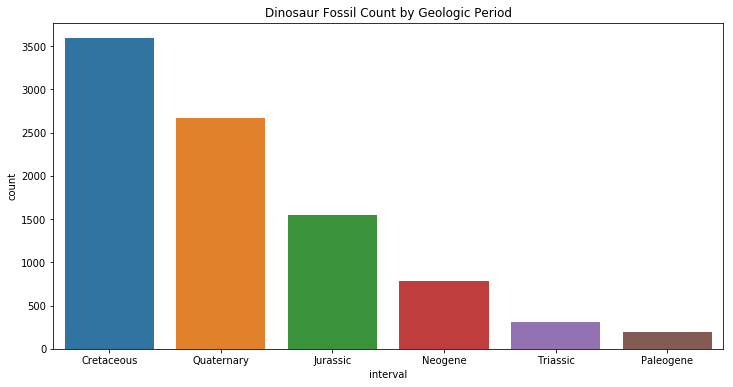

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6)) #create a figure that is 12 x 6
ax = sns.countplot(x='interval', data=interesting, order=interesting['interval'].value_counts().index.tolist())
plt.title("Dinosaur Fossil Count by Geologic Period")
plt.show()

"Jurassic Park" should have been called "Cretaceous Park"! Dinosaurs lived during the Mesozoic era, which is composed of three periods: the Triassic, Jurrassic and the Cretaceous. It is likely that there are more fossils during the Cretaceous because it was closer in time to present-day. However, it is puzzling that there are so many fossils found during the Quaternary period, given that dinosaurs only lived millions of years before the Quaternary. Let's attempt to answer this question by looking at the location of dinosaur fossils.

### Location of Dinosaur Fossils

Now, let's look at the spread of dinosaur fossils across the 50 states.

In [26]:
print(interesting["state"].unique())
print(len(interesting["state"].unique()))
interesting["state"].value_counts()

['Connecticut' 'Colorado' 'Montana' 'Oklahoma' 'New Mexico' 'Arizona'
 'Wyoming' 'Utah' 'Florida' 'California' 'Kansas' 'Nebraska' 'Texas'
 'South Dakota' 'New Jersey' 'North Dakota' 'Georgia' 'Mississippi'
 'Nevada' 'Indiana' 'Maryland' 'Massachusetts' 'Missouri' 'Tennessee'
 'Delaware' 'Alabama' 'Arkansas' 'Pennsylvania' 'District of Columbia'
 'Idaho' 'Louisiana' 'North Carolina' 'South Carolina' 'Virginia'
 'New York' 'Arizona/Utah' 'Michigan' 'Oregon' 'Washington' 'Maine'
 'West Virginia' 'Alberta' 'Illinois' 'Ohio']
44


California              1467
Wyoming                 1072
Montana                  903
Florida                  885
New Mexico               882
Utah                     642
Colorado                 550
Texas                    401
Massachusetts            322
Virginia                 254
North Dakota             250
South Dakota             153
Arizona                  145
Oregon                   144
North Carolina           141
New Jersey               131
Connecticut              107
Maryland                  73
Alabama                   57
Kansas                    56
Idaho                     55
Georgia                   54
Oklahoma                  53
Nebraska                  42
Ohio                      41
Pennsylvania              38
Tennessee                 34
Illinois                  31
Washington                19
Nevada                    18
Maine                     15
Mississippi               12
Delaware                  11
South Carolina             9
Arkansas      

Here we have a mis-entry. Alberta is a province of Canada, so we'll drop this row.

In [27]:
interesting[interesting["state"] == "Alberta"]

,accepted_name,state,lat,lng,environment,created,country,early_interval,late_interval,interval
7013,Albertadromeus syntarsus,Alberta,49.179443,-110.682777,terrestrial indet.,2013-05-08 21:18:11,US,Campanian,NaN,Cretaceous


In [28]:
interesting = interesting[interesting.state != "Alberta"]
interesting.shape #as expected, we have one less entry

(9093, 10)

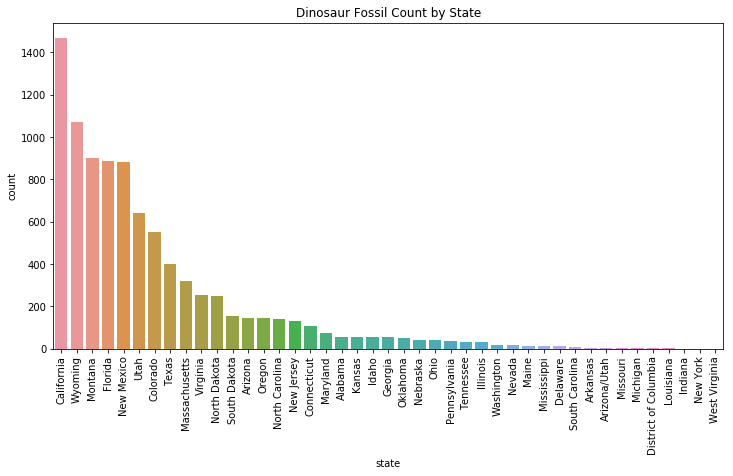

In [29]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='state', data=interesting, order=interesting['state'].value_counts().index.tolist())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Dinosaur Fossil Count by State")
plt.show()

According to this plot, California has the largest quantity of found dinosaur fossils. This finding is a bit puzzling. During the Mesozoic era, when most dinosaurs lived, California was still covered by the ocean. Let's look at some of the fossils found in California to see what we find.

In [30]:
interesting[interesting["state"] == "California"].head()

,accepted_name,state,lat,lng,environment,created,country,early_interval,late_interval,interval
45,Hadrogyps aigialeus,California,35.299999,-118.500000,shoreface,2002-02-18 12:54:21,US,Langhian,NaN,Neogene
46,Miomancalla wetmorei,California,33.561943,-117.712219,basinal (siliciclastic),2002-02-19 12:56:07,US,Tortonian,NaN,Neogene
188,Saurolophinae,California,37.466667,-121.216667,marine indet.,2005-10-12 10:57:20,US,Maastrichtian,NaN,Cretaceous
218,Falconiformes,California,33.228889,-116.260277,fluvial indet.,2002-10-16 16:21:34,US,Irvingtonian,NaN,Quaternary
264,Anatidae,California,37.056667,-120.195831,lacustrine indet.,2002-11-20 12:50:20,US,Irvingtonian,NaN,Quaternary


Interestingly, 4/5 of our first five entries are fossils found in the Neogene and Quaternary periods, millions of years after dinosaurs roamed the earth. *Miomancalla wetmorei*, shown in row 2, is a species of flightless auk, or penguin-esque birds (picture shown below). According to this page of [fossilworks.org](http://fossilworks.org/bridge.pl?a=taxonInfo&taxon_no=105697), which is a site that describes entries in PBDB, this specimen is a fossilized limb of an auk that lived roughly 7 million - 11 million years ago. 

<img src="https://upload.wikimedia.org/wikipedia/commons/5/59/Parakeetauklets2.jpg" width="500"/> 

**It turns out that our data not only contains dinosaur fossils, but also the fossils of their descendants!** Because I took all the results from the *Dinosauria* clade in the PBDB navigator, *Aves*, or birds, were also included due to their line of descent from theropoda dinosaurs (dinosaurs classified by their three toes and hollow limbs).

Now let's look at the environments that the fossils were found in. It looks like a vast majority were found in an indeterminate terrestrial environment.

In [31]:
print(interesting["environment"].unique())
print("")
print("Total unique environment types: ", len(interesting["environment"].unique()))

['terrestrial indet.' 'fluvial-lacustrine indet.' 'coastal indet.'
 '"channel"' 'fluvial indet.' 'coarse channel fill' 'wet floodplain'
 '"floodplain"' 'shoreface' 'basinal (siliciclastic)' 'marine indet.'
 'pond' 'crevasse splay' 'lacustrine indet.' 'lacustrine - small'
 'fine channel fill' 'lagoonal' 'levee' 'estuary/bay'
 'marginal marine indet.' 'deltaic indet.' 'dune'
 'shallow subtidal indet.' 'mire/swamp' 'alluvial fan'
 'lagoonal/restricted shallow subtidal' 'paralic indet.' 'channel lag'
 'transition zone/lower shoreface' 'offshore' 'fissure fill' 'interdune'
 'eolian indet.' 'karst indet.' 'dry floodplain' 'delta plain'
 'interdistributary bay' 'spring' 'fluvial-deltaic indet.'
 'lacustrine - large' 'peritidal' 'carbonate indet.' 'offshore shelf'
 'cave' 'sinkhole' 'glacial' 'lacustrine delta plain' 'foreshore'
 'basinal (siliceous)' 'tar' 'deep subtidal shelf' 'offshore indet.'
 'deep-water indet.' nan 'open shallow subtidal' 'lacustrine delta front'
 'lacustrine deltaic ind

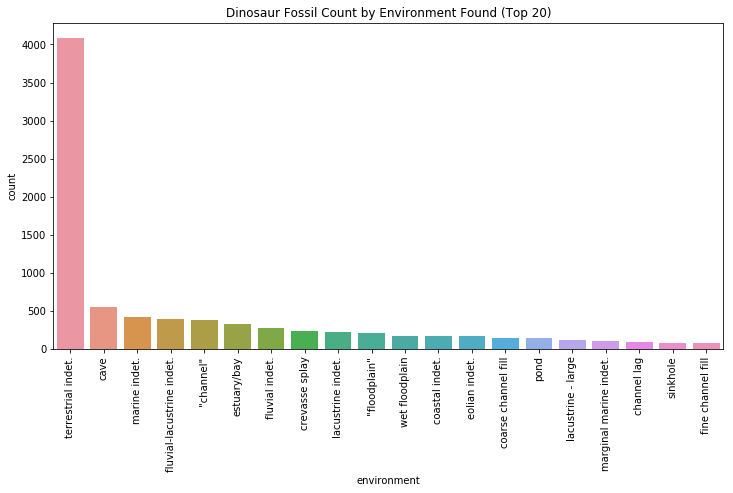

In [32]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='environment', data=interesting, order = interesting['environment'].value_counts().index.tolist()[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Dinosaur Fossil Count by Environment Found (Top 20)")
plt.show()

The overwhelming majority of environment types is terrestrial indeterminate, which accounts for all land-based discoveries that don't have any defining features. The second most common type of environemnt is caves, which preserve fossils beautifully by trapping sediment that are washed or blown in by waves or wind.

In [33]:
print(interesting["accepted_name"].unique())
print("")
print("Total unique fossil types: ", len(interesting["accepted_name"].unique()))

['Theropoda' 'Camarasaurus grandis' 'Camarasaurus supremus' ... 'Corvidae'
 'Rhinorex condrupus' 'Macroelongatoolithus']

Total unique fossil types:  1532


What is our most common dinosaur fossil?

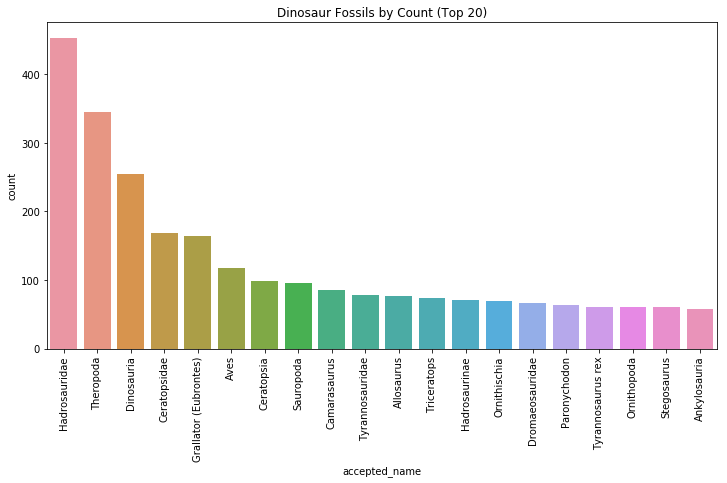

In [34]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='accepted_name', data=interesting, order = interesting['accepted_name'].value_counts().index.tolist()[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Dinosaur Fossils by Count (Top 20)")
plt.show()

Our top fossil in terms of count is the [Hadrosauridae](https://en.wikipedia.org/wiki/Hadrosaurid), commonly characterized by their duck-billed beaks. They are descendants of the Upper Jurassic/Lower Cretaceous iguanodontian dinosaurs and were most commonly found in the late Cretaceous era. Although Hadrosauridae can grow very large (28 feet long), they are herbivores, with their duck bills are evolved for grinding plants.

<img src="https://upload.wikimedia.org/wikipedia/commons/7/7f/Knight_hadrosaurs.jpg" width="500"/>

Now let's look at the distributions of the most common dinosaurs across the geological periods using a [facetgrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html). To keep our visualization clutter-free, we'll limit our dinosaurs to the top 10 most common.

In [35]:
top10 = interesting['accepted_name'].value_counts().index.tolist()[:10]
top_dinos = interesting[interesting["accepted_name"].isin(top10)]
top_dinos

,accepted_name,state,lat,lng,environment,created,country,early_interval,late_interval,interval
19,Theropoda,Connecticut,41.566666,-72.633331,terrestrial indet.,2011-07-28 02:09:51,US,Hettangian,Sinemurian,Jurassic
26,Hadrosauridae,Montana,47.695831,-106.227776,"""channel""",2002-01-15 15:16:43,US,Maastrichtian,NaN,Cretaceous
36,Theropoda,Colorado,38.278610,-108.930832,terrestrial indet.,2002-02-05 14:36:05,US,Rhaetian,Hettangian,Triassic
41,Dinosauria,Utah,39.267223,-111.254166,fluvial-lacustrine indet.,2002-02-16 15:34:49,US,Late Maastrichtian,Tertiary,Cretaceous
58,Dinosauria,Wyoming,42.152302,-105.916199,pond,2002-03-01 16:16:35,US,Kimmeridgian,Tithonian,Jurassic
59,Camarasaurus,Wyoming,42.152302,-105.916199,pond,2002-03-01 16:16:35,US,Kimmeridgian,Tithonian,Jurassic
62,Ceratopsidae,Wyoming,43.349400,-104.482002,"""channel""",2002-07-10 20:49:32,US,Maastrichtian,NaN,Cretaceous
63,Hadrosauridae,Wyoming,43.349400,-104.482002,"""channel""",2002-07-10 20:49:32,US,Maastrichtian,NaN,Cretaceous
68,Camarasaurus,Wyoming,42.017776,-106.048615,coarse channel fill,2005-04-06 14:02:26,US,Kimmeridgian,Tithonian,Jurassic
79,Theropoda,Montana,48.633301,-113.750000,"""floodplain""",2002-07-10 20:49:32,US,Campanian,NaN,Cretaceous


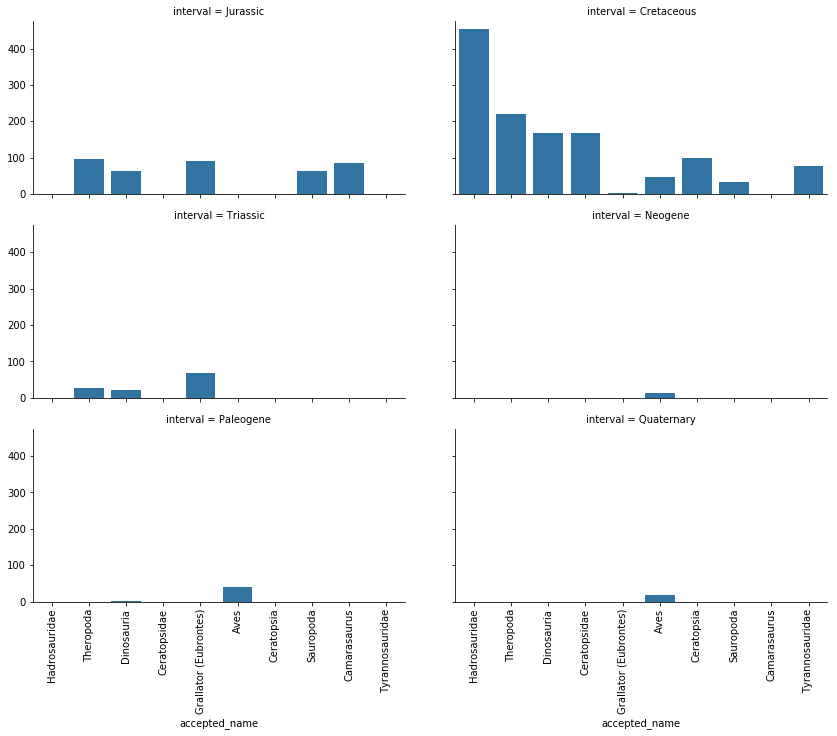

In [36]:
g = sns.FacetGrid(top_dinos, col="interval", col_wrap=2, aspect=2)
g = g.map(sns.countplot, "accepted_name", order=interesting['accepted_name'].value_counts().index.tolist()[:10])
g.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

It appears that the Neogene, Paleogene, and Quaternary periods only contain Aves, or bird, fossils. This makes sense, as we would expect no dinosaur fossils to exist past the Triassic period. So, as this data shows, the reason behind why *Aves* fossils are among our top 10 most common "dinosaur" fossils are due to their prevalence amongst the Neogene, Paleogene, and Quaternary periods.


This concludes our exploratory analysis and data cleaning of our dinosaur data.

# Part II: Plant Fossils 

Now, let's perform the same data cleaning and exploratory analysis on the PLANT fossils of the United States! First, obtain and perform a URL request.

In [76]:
plant_URL = "https://paleobiodb.org/data1.2/occs/list.json?lngmin=-146.9531&lngmax=-45.7031&latmin=22.6748&latmax=50.4575&base_id=54311&show=coords,attr,loc,prot,time,strat,stratext,lith,lithext,geo,rem,ent,entname,crmod&datainfo"

plant_r = requests.get(url=plant_URL) #store the data obtained through the HTTP request in r
plant_data = plant_r.json() #converts the data in r to a json file
with open("plant_NA.json", "w") as write_file:
    json.dump(plant_data, write_file) #creates file dino_NA.json""

In [77]:
plant_df = pd.DataFrame.from_dict(json_normalize(plant_data))
plant_df

,access_time,data_license,data_provider,data_source,data_url,documentation_url,elapsed_time,license_url,parameters.base_id,parameters.latmax,parameters.latmin,parameters.lngmax,parameters.lngmin,parameters.show,parameters.taxon_status,parameters.timerule,records,title
0,Tue 2019-04-02 17:57:22 GMT,Creative Commons CC-BY,The Paleobiology Database,The Paleobiology Database,http://paleobiodb.org/data1.2/occs/list.json?l...,http://paleobiodb.org/data1.2/occs/list_doc.html,2.64,http://creativecommons.org/licenses/by/4.0/,54311,50.4575,22.6748,-45.7031,-146.9531,"coords,attr,loc,prot,time,strat,stratext,lith,...",all,major,"[{'oid': 'occ:3285', 'cid': 'col:324', 'idn': ...",PBDB Data Service


In [78]:
plant_df = pd.DataFrame.from_dict(json_normalize(plant_data, ["records"]))
plant_df.head()

,ath,ati,cc2,cid,cny,cxi,dcr,dmd,eag,eid,...,srb,sro,srs,ssc,stp,szn,tdf,tec,tid,tna
0,J. Sepkoski,prs:48,US,col:324,NaN,21,1998-11-20 07:59:51,2017-01-07 23:13:35,460.9,NaN,...,NaN,NaN,NaN,NaN,New York,NaN,species not entered,passive margin,txn:5083,Tetradium
1,J. Sepkoski,prs:48,US,col:335,NaN,30,1998-11-20 07:59:51,2017-01-07 21:38:25,470.0,NaN,...,NaN,NaN,NaN,NaN,New York,NaN,NaN,passive margin,txn:5083,Tetradium
2,J. Sepkoski,prs:48,US,col:368,NaN,29,1998-11-20 07:59:51,2017-01-07 16:00:10,449.5,NaN,...,NaN,NaN,NaN,NaN,Ohio,NaN,NaN,NaN,txn:5083,Tetradium
3,P. Wagner,prs:7,US,col:374,Franklin,29,2005-05-03 16:55:33,2005-05-03 18:55:33,449.5,rei:12727,...,NaN,NaN,NaN,bed,Indiana,NaN,subjective synonym of,NaN,txn:327177,Tetradium huronense
4,J. Sepkoski,prs:48,US,col:392,NaN,29,1998-11-20 07:59:51,2017-01-02 04:05:42,449.5,NaN,...,NaN,NaN,NaN,formation,Ohio,NaN,NaN,foreland basin,txn:5083,Tetradium


Using the function we defined above, we now rename the columns of our plant dataframe.

In [79]:
df_rename(plant_df)
print(plant_df.shape)
plant_df.head()

(18081, 61)


,authorizer,authorizer_no,country,collection_no,county,cx_int_no,created,modified,max_ma,reid_no,...,srb,sro,regional_section,stratscale,state,szn,diference,tec,accepted_no,accepted_name
0,J. Sepkoski,prs:48,US,col:324,NaN,21,1998-11-20 07:59:51,2017-01-07 23:13:35,460.9,NaN,...,NaN,NaN,NaN,NaN,New York,NaN,species not entered,passive margin,txn:5083,Tetradium
1,J. Sepkoski,prs:48,US,col:335,NaN,30,1998-11-20 07:59:51,2017-01-07 21:38:25,470.0,NaN,...,NaN,NaN,NaN,NaN,New York,NaN,NaN,passive margin,txn:5083,Tetradium
2,J. Sepkoski,prs:48,US,col:368,NaN,29,1998-11-20 07:59:51,2017-01-07 16:00:10,449.5,NaN,...,NaN,NaN,NaN,NaN,Ohio,NaN,NaN,NaN,txn:5083,Tetradium
3,P. Wagner,prs:7,US,col:374,Franklin,29,2005-05-03 16:55:33,2005-05-03 18:55:33,449.5,rei:12727,...,NaN,NaN,NaN,bed,Indiana,NaN,subjective synonym of,NaN,txn:327177,Tetradium huronense
4,J. Sepkoski,prs:48,US,col:392,NaN,29,1998-11-20 07:59:51,2017-01-02 04:05:42,449.5,NaN,...,NaN,NaN,NaN,formation,Ohio,NaN,NaN,foreland basin,txn:5083,Tetradium


In [80]:
plant_df.columns

Index(['authorizer', 'authorizer_no', 'country', 'collection_no', 'county',
       'cx_int_no', 'created', 'modified', 'max_ma', 'reid_no', 'eni',
       'enterer', 'environment', 'fossils_from_1', 'fossils_from_2', 'flg',
       'geology_comments', 'geog_comments', 'geog_scale', 'identified_name',
       'idr', 'identified_no', 'lith_adj_1', 'lith_adj_2', 'min_ma', 'lat',
       'lith_descript', 'lithification_1', 'lithification_2',
       'minor_lithology_1', 'minor_lithology_2', 'lng', 'lithology_1',
       'lithology_2', 'modifier', 'mdi', 'occurance_comments',
       'early_interval', 'oid', 'late_interval', 'prc', 'protected', 'rid',
       'rnk', 'strat_comments', 'formation', 'stratgroup', 'local_bed',
       'local_order', 'local_section', 'member', 'srb', 'sro',
       'regional_section', 'stratscale', 'state', 'szn', 'diference', 'tec',
       'accepted_no', 'accepted_name'],
      dtype='object')

In [81]:
plants = plant_df[["accepted_name", "state", "lat", "lng", "environment", "created", "country", "early_interval", "late_interval"]]
plants.head()

,accepted_name,state,lat,lng,environment,created,country,early_interval,late_interval
0,Tetradium,New York,43.212776,-75.456108,shallow subtidal indet.,1998-11-20 07:59:51,US,Blackriveran,NaN
1,Tetradium,New York,43.212776,-75.456108,deep subtidal shelf,1998-11-20 07:59:51,US,Middle Ordovician,NaN
2,Tetradium,Ohio,39.445278,-83.828613,offshore,1998-11-20 07:59:51,US,Richmondian,NaN
3,Tetradium huronense,Indiana,39.423058,-85.012779,shallow subtidal indet.,2005-05-03 16:55:33,US,Richmondian,NaN
4,Tetradium,Ohio,39.000000,-84.000000,offshore ramp,1998-11-20 07:59:51,US,Richmond,Ashgill


In [82]:
plants["country"].unique()

array(['US', 'MX', 'CA', 'BS'], dtype=object)

As above, we get ride of all the data not contained in the US. We see that there are 16,122 entries.

In [83]:
plants = plants[plants["country"] == "US"]
print(plants.shape)
plants.head()

(16242, 9)


,accepted_name,state,lat,lng,environment,created,country,early_interval,late_interval
0,Tetradium,New York,43.212776,-75.456108,shallow subtidal indet.,1998-11-20 07:59:51,US,Blackriveran,NaN
1,Tetradium,New York,43.212776,-75.456108,deep subtidal shelf,1998-11-20 07:59:51,US,Middle Ordovician,NaN
2,Tetradium,Ohio,39.445278,-83.828613,offshore,1998-11-20 07:59:51,US,Richmondian,NaN
3,Tetradium huronense,Indiana,39.423058,-85.012779,shallow subtidal indet.,2005-05-03 16:55:33,US,Richmondian,NaN
4,Tetradium,Ohio,39.000000,-84.000000,offshore ramp,1998-11-20 07:59:51,US,Richmond,Ashgill


In [84]:
plants["interval"] = plants["early_interval"]
plants

,accepted_name,state,lat,lng,environment,created,country,early_interval,late_interval,interval
0,Tetradium,New York,43.212776,-75.456108,shallow subtidal indet.,1998-11-20 07:59:51,US,Blackriveran,NaN,Blackriveran
1,Tetradium,New York,43.212776,-75.456108,deep subtidal shelf,1998-11-20 07:59:51,US,Middle Ordovician,NaN,Middle Ordovician
2,Tetradium,Ohio,39.445278,-83.828613,offshore,1998-11-20 07:59:51,US,Richmondian,NaN,Richmondian
3,Tetradium huronense,Indiana,39.423058,-85.012779,shallow subtidal indet.,2005-05-03 16:55:33,US,Richmondian,NaN,Richmondian
4,Tetradium,Ohio,39.000000,-84.000000,offshore ramp,1998-11-20 07:59:51,US,Richmond,Ashgill,Richmond
5,Tetradium,Ohio,39.000000,-84.000000,deep subtidal ramp,1998-11-20 07:59:51,US,Richmondian,Ashgill,Richmondian
6,Tetradium,Ohio,39.000000,-84.000000,shallow subtidal indet.,1998-11-20 07:59:51,US,Richmondian,Ashgill,Richmondian
7,Tetradium,Ohio,39.000000,-84.000000,deep subtidal ramp,1998-11-20 07:59:51,US,Richmondian,NaN,Richmondian
8,Stacheia,Indiana,39.500000,-86.500000,delta plain,1999-01-14 15:00:00,US,Chadian,Arundian,Chadian
9,Stacheia,Indiana,39.750000,-86.666664,interdistributary bay,1999-01-14 15:00:00,US,Chadian,Arundian,Chadian


In [85]:
plants["interval"].unique()

array(['Blackriveran', 'Middle Ordovician', 'Richmondian', 'Richmond',
       'Chadian', 'Brigantian', 'Rocklandian', 'Shermanian',
       'Franklinian', 'Maysvillian', 'Chesterian', 'Meramecian',
       'Kinderhookian', 'Osagean', 'Frasnian', 'Mississippian',
       'Givetian', 'Emsian', 'Late Emsian', 'Early Devonian',
       'Late Triassic', 'Westphalian D', 'Desmoinesian', 'Carboniferous',
       'Pennsylvanian', 'Oligocene', 'Miocene', 'Wasatchian', 'Tertiary',
       'Clarkforkian', 'Missourian', 'Permian', 'Sakmarian', 'Artinskian',
       'Asselian', 'Rotliegendes', 'Late Pennsylvanian', 'Bashkirian',
       'Podolskian', 'Westphalian', 'Atokan', 'Morrowan',
       'Early Pennsylvanian', 'Virgilian', 'Lostcabinian', 'Tiffanian',
       'Torrejonian', 'Puercan', 'Graybullian', 'Early Eocene',
       'Lutetian', 'Kimmeridgian', 'Tournaisian', 'Late Albian',
       'Late Devonian', 'Middle Devonian', 'Famennian', 'Late Frasnian',
       'Early Famennian', 'Late Givetian', 'Early F

We can use the function we defined in the Dinosaur section to perform a coarse data transformation. This is one example of how functions can be useful!

In [86]:
change_geog(Cretaceous, "Cretaceous", plants)
change_geog(Jurassic, "Jurassic", plants)
change_geog(Triassic, "Triassic", plants)
change_geog(Neogene, "Neogene", plants)
change_geog(Paleogene, "Paleogene", plants)
change_geog(Quaternary, "Quaternary", plants)

Again, we round every interval to the nearest era. However, we find that a lot of these plant data are dated back to Paleozoid era, earlier than any of our dinosaur data. Thus, we will only keep the data found in the Mesozoic and Cenozoic, shown below.

In [87]:
dino_plants = plants[plants["interval"].isin(["Cretaceous", "Jurassic", "Triassic", "Neogene", "Paleogene", "Quaternary"])]
dino_plants

,accepted_name,state,lat,lng,environment,created,country,early_interval,late_interval,interval
96,Neocalamites,New Mexico,35.200001,-105.783333,fluvial indet.,2001-06-08 06:53:35,US,Late Triassic,NaN,Triassic
97,Brachyphyllum,New Mexico,35.200001,-105.783333,fluvial indet.,2001-06-08 06:53:35,US,Late Triassic,NaN,Triassic
98,Masculostrobus,New Mexico,35.200001,-105.783333,fluvial indet.,2001-06-08 06:53:35,US,Late Triassic,NaN,Triassic
99,Samaropsis,New Mexico,35.200001,-105.783333,fluvial indet.,2001-06-08 06:46:34,US,Late Triassic,NaN,Triassic
100,Samaropsis,New Mexico,35.200001,-105.783333,fluvial indet.,2001-06-08 06:46:34,US,Late Triassic,NaN,Triassic
101,Samaropsis,New Mexico,35.200001,-105.783333,fluvial indet.,2001-06-08 06:46:34,US,Late Triassic,NaN,Triassic
102,Samaropsis,New Mexico,35.200001,-105.783333,fluvial indet.,2001-06-08 06:46:34,US,Late Triassic,NaN,Triassic
103,Samaropsis,New Mexico,35.200001,-105.783333,fluvial indet.,2001-06-08 06:46:34,US,Late Triassic,NaN,Triassic
468,Abies,Montana,45.150002,-113.116669,"""floodplain""",2001-06-24 15:34:18,US,Oligocene,Miocene,Paleogene
469,Sequoia,Montana,45.150002,-113.116669,"""floodplain""",2001-06-24 15:34:18,US,Oligocene,Miocene,Paleogene


In [88]:
dino_plants.shape

(9943, 10)

It looks like a majority of our US plant data concurr with the eras of our dinosaur data. Above, we found that the total number of entries in our US data was 16122. After filtering out everything in the Paleozoic era, we are left with 9959 entries.

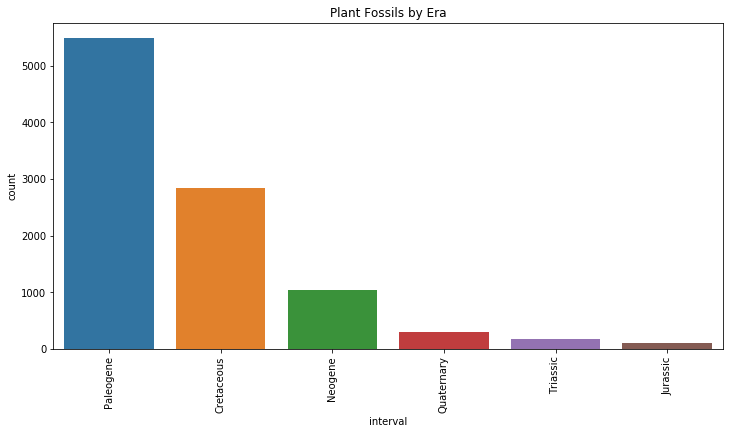

In [89]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='interval', data=dino_plants, order=dino_plants['interval'].value_counts().index.tolist())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Plant Fossils by Era")
plt.show()

Contrary to our data for dinosaur fossils by era, it looks like most of our plants are from the Paleogene (our dinosaurs were the fewest in the Paleogene). It looks like in general, the further back we go, the less likely there is for plant fossils to exist. This makes sense, since we would expect dinosaurs to fossilize better than plants.

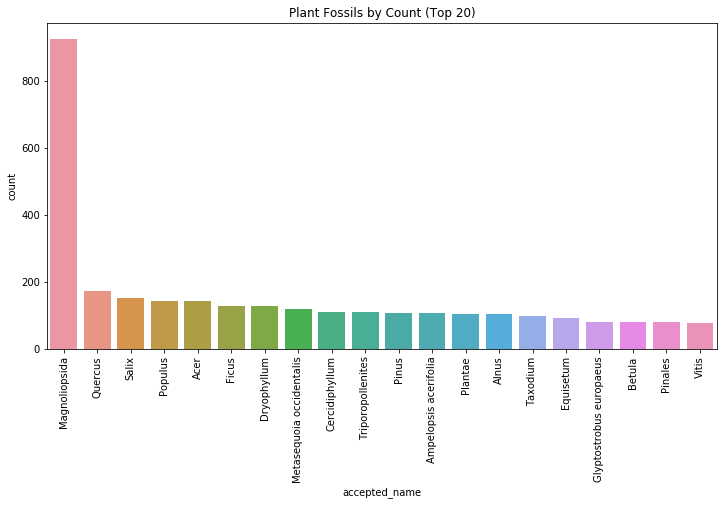

In [90]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='accepted_name', data=dino_plants, order=dino_plants['accepted_name'].value_counts().index.tolist()[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Plant Fossils by Count (Top 20)")
plt.show()

We see that Magnoliopsida is the most common plant fossil found in our data. After a quick google search, we find that [Magnoliopsida](https://en.wikipedia.org/wiki/Magnoliopsida) is a class of flowering plant that includes the common magnolia. Today, it is considered a living fossil due to its age and lack of change through the centuries.

<img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/P4050021.jpg" alt="magnolia" width="400"/>

Now, let's look at the distribution of plants across the eras.

In [91]:
top10_plants = dino_plants['accepted_name'].value_counts().index.tolist()[:10]
top_plants = dino_plants[dino_plants["accepted_name"].isin(top10_plants)]
top_plants

,accepted_name,state,lat,lng,environment,created,country,early_interval,late_interval,interval
470,Acer,Montana,45.150002,-113.116669,"""floodplain""",2001-06-24 15:34:18,US,Oligocene,Miocene,Paleogene
471,Acer,Montana,45.150002,-113.116669,"""floodplain""",2001-06-24 15:34:18,US,Oligocene,Miocene,Paleogene
472,Cercidiphyllum,Montana,45.150002,-113.116669,"""floodplain""",2001-06-24 15:34:18,US,Oligocene,Miocene,Paleogene
482,Metasequoia occidentalis,Montana,45.000000,-113.216667,lacustrine - large,2001-06-24 15:34:18,US,Miocene,NaN,Neogene
513,Acer,North Dakota,46.883331,-102.783333,"""channel""",2001-06-25 09:42:07,US,Clarkforkian,NaN,Paleogene
535,Metasequoia occidentalis,North Dakota,46.983334,-102.050003,"""channel""",2001-06-25 10:56:12,US,Clarkforkian,NaN,Paleogene
553,Metasequoia occidentalis,North Dakota,47.306389,-102.112503,"""channel""",2001-06-25 11:36:56,US,Clarkforkian,NaN,Paleogene
565,Metasequoia occidentalis,North Dakota,47.000000,-101.550003,"""channel""",2001-06-25 12:10:52,US,Clarkforkian,NaN,Paleogene
832,Metasequoia occidentalis,North Dakota,47.000000,-101.550003,"""channel""",2001-07-08 17:54:30,US,Wasatchian,NaN,Paleogene
836,Metasequoia occidentalis,North Dakota,46.750000,-102.750000,"""channel""",2001-07-08 18:04:24,US,Wasatchian,NaN,Paleogene


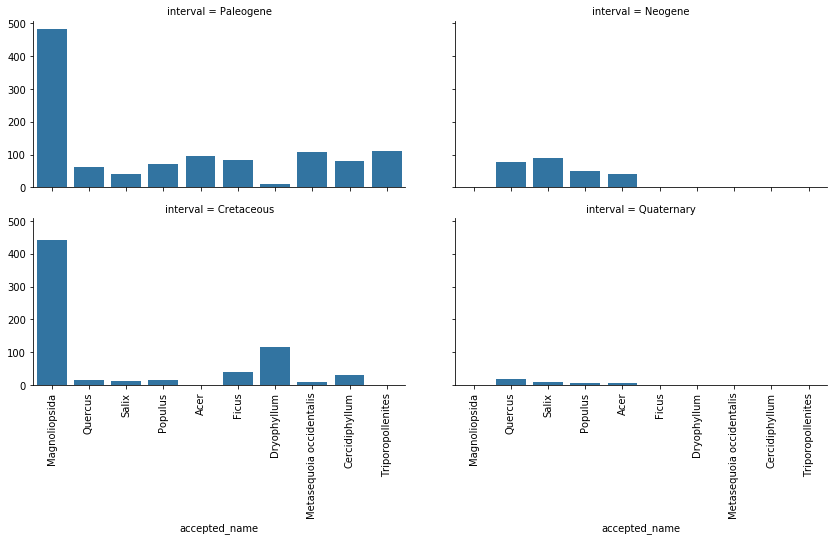

In [92]:
g = sns.FacetGrid(top_plants, col="interval", col_wrap=2, aspect=2)
g = g.map(sns.countplot, "accepted_name", order=dino_plants['accepted_name'].value_counts().index.tolist()[:10])
g.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# In Conclusion

In parts I and II, we imported data from the PBDB navigator and loaded it into Jupyter notebook. We cleaned the data by renaming columns, selecting the data columns of interest, and making the time scale of our entries coarser and easier to work with in the future. While we cleaned our data, we also performed some elementary exploratory analysis such as looking at the most common type of fossil specimen, the state with the most fossil counts, and the dinosaur count by era. We discovered that the data we're using not only contains dinosaur fossils, but fossils of their descendents, including some that are still living to this day!

**Here are some key take-aways from this part of our exploration:**
1. Defining functions are key in making data cleaning easier. By defining our function change_geog(), we were able to easily rename our time scales in both our dinosaur data and our plant data.
2. Exploratory analysis is crucial to understanding what kind of data you're working with. After I initially selected to work with the *Dinosauria* on the PBDB navigator, I assumed I would be receiving traditional dinosaur fossils from the Mezosoic era. Exploratory analysis helped me discover that there were data points that occurred later in the geologic time scale.

Now that we've cleaned our data and understand what we're working with, we're ready to perform further analysis and visualization! Let's export our important data in the form of an hdf file for further use.

In [94]:
from pathlib import Path
Path("data/part1").mkdir(parents=True, exist_ok=True)
data_file = Path("data/part1", "dino_data.hdf") # Path of hdf file
interesting.to_hdf(data_file, "interesting") 
dino_plants.to_hdf(data_file, "dino_plants") 
dino_df.to_hdf(data_file, "dino_df")

c:\users\zliu1\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\generic.py:1996: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['accepted_name', 'state', 'environment', 'created', 'country', 'early_interval', 'late_interval', 'interval']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
c:\users\zliu1\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\generic.py:1996: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block2_values] [items->['authorizer', 'authorizer_no', 'country', 'collection_no', 'county', 'created', 'modified', 'reid_no', 'eni', 'enterer', 'environment', 'fossils_from_1', 'fossils_from_2', 'flg', 'geology_comments', 'geog_comments', 'geog_scale', 'identified_name', 'identified_